In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [3]:
def long_call(price, strike, premium):    
    lc = list(map(lambda x: max(x - strike, 0) - premium, price))
    return lc

def long_put(price, strike, premium):
    lp = list(map(lambda x: max(strike - x ,0) - premium, price))
    return lp
   
def short_call(price, strike, premium):
#Payoff a shortcall is just the inverse of the payoff of a long call 
    sc = long_call(price, strike, premium)
    return [-1.0*SC for SC in sc]

def short_put(price, strike, premium):
#Payoff a short put is just the inverse of the payoff of a long put 
    sp = long_put(price, strike, premium)
    return [-1.0*SP for SP in sp]
    
def binary_call(price, strike, premium):
#Payoff of a binary call is either:     # 1.) Strike if current price > strike     # 2.) 0     
    bc = list(map(lambda x: strike - premium if x > strike else 0 - premium, price))
    return bc

def binary_put(price, strike, premium):
#Payoff of a binary call is either:     # 1.) Strike if current price < strike     # 2.) 0     
    bp = list(map(lambda x: strike - premium if x < strike else 0 - premium, price))
    return bp

In [4]:
#Set parameters
S = [t/5 for t in range(0,1000)] #define some series of stock-prices 
K = 110 #strike price
P = 10  #premium

# Plots for Long/Short/Binary Call/Put

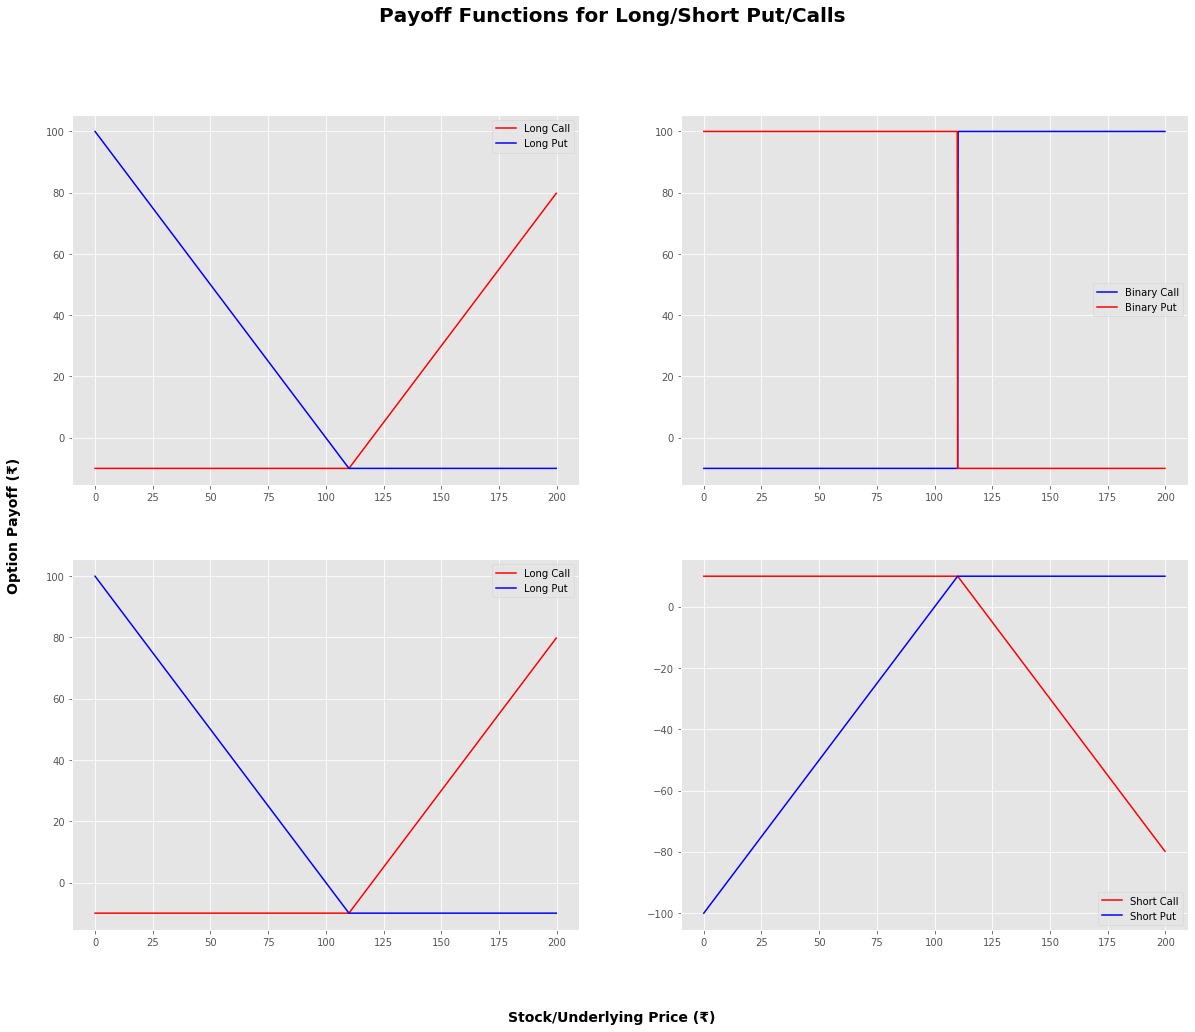

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize = (20,15))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=20, fontweight='bold')
fig.text(0.5, 0.04, 'Stock/Underlying Price (₹)', ha='center', fontsize=14, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff (₹)', va='center', rotation='vertical', fontsize=14, fontweight='bold')


lc_P = long_call(S,K,P)
lp_P = long_put(S,K,P)
plt.subplot(221)
plt.plot(S, lc_P, 'r')
plt.plot(S, lp_P, 'b')
plt.legend(["Long Call", "Long Put"])


bc_P = binary_call(S,K,P)
bp_P = binary_put(S,K,P)
plt.subplot(222)
plt.plot(S, bc_P, 'b')
plt.plot(S, bp_P, 'r')
plt.legend(["Binary Call", "Binary Put"])
    
T2 = long_call(S,K,P)
T4 = long_put(S,K,P)
plt.subplot(223)
plt.plot(S,T2, 'r')
plt.plot(S, T4, 'b')
plt.legend(["Long Call", "Long Put"])
    
    
sc_P = short_call(S,K,P)
sp_P = short_put(S,K,P)
plt.subplot(224)
plt.plot(S, sc_P, 'r')
plt.plot(S, sp_P, 'b')
plt.legend(["Short Call", "Short Put"])
    
plt.show()

# Bull Spread, Bear Spread, Straddle, Risk Reversal, Strangle, Butterfly Spread, Strips, Straps

Bull Spread: Bullish, vertical spread options strategy that is designed to profit from a moderate rise in the price of the underlying security.

Bear Spead: Used by investor who is mildly bearish and wants to maximize profit while minimizing losses

Straddle: Trader buys/sells a Call option and a Put option simultaneously for the same underlying asset at a certain point of time provided both options have the same expiry date and same strike price

Strangle: Investor holding both a call and a put on the same underlying asset. A strangle covers investors who think an asset will move dramatically but are unsure of the direction. A strangle is profitable only if the underlying asset does swing sharply in price

Risk Reversal: Hedging strategy that protects a long or short position by using put and call options. This strategy protects against unfavorable price movements in the underlying position but limits the profits that can be made on that position

Butterfly Spread: Strategy combining bull and bear spreads, with a fixed risk and capped profit. These spreads, involving either four calls or four puts are intended as a market-neutral strategy and pay off the most if the underlying does not move prior to option expiration.

Strips: When a trader is bearish on the market and bullish on volatility then he will implement this strategy by buying two ATM Put Options & one ATM Call Option, of the same strike price, expiry date & underlying asset.

Straps: Strategy using one put and two calls with the same strike and expiration. Traders use it when they believe a large move in the underlying asset is likely although the direction is still uncertain

In [6]:
def bull_spread(price, strike1, strike2, premium1, premium2):
    
    bs1 = long_call(price, strike1, premium1)
    bs2 = short_call(price, strike2, premium2)
    return [x+y for x,y in zip(bs1, bs2)] 
     
def bear_spread(price, strike1, strike2, premium1, premium2):
    
    bs = bull_spread(price, strike1, strike2, premium1, premium2)
    return [-1.0*p + 1.0 for p in bs] 

def straddle(price, strike, premium1, premium2):
    
    P1 = long_call(price, strike, premium1)
    P2 = long_put(price, strike, premium2)
    return [x+y for x,y in zip(P1, P2)]
    
def risk_reversal(price, strike1, strike2, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = short_put(price, strike2, premium2)
    return [x + y for x, y in zip(P1, P2)]

def strangle(price, strike1, strike2, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_put(price, strike2, premium2)
    return [x + y for x, y in zip(P1, P2)]


def butterfly_spread(price, strike1, strike2, strike3, premium1, premium2, premium3):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_call(price, strike3, premium3)
    P3 = short_call(price, strike2, premium2)
    P3 =[2*p for p in P3]
    return [x + y + z for x, y, z in zip(P1, P2, P3)]
    
def strip(price, strike1, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_put(price, strike1, premium2)
    P2 = [2*p for p in P2]
    return [x+y for x,y in zip(P1, P2)]

def strap(price, strike1, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_put(price, strike1, premium2)
    P1 = [2*p for p in P1]
    return [x+y for x,y in zip(P1, P2)]

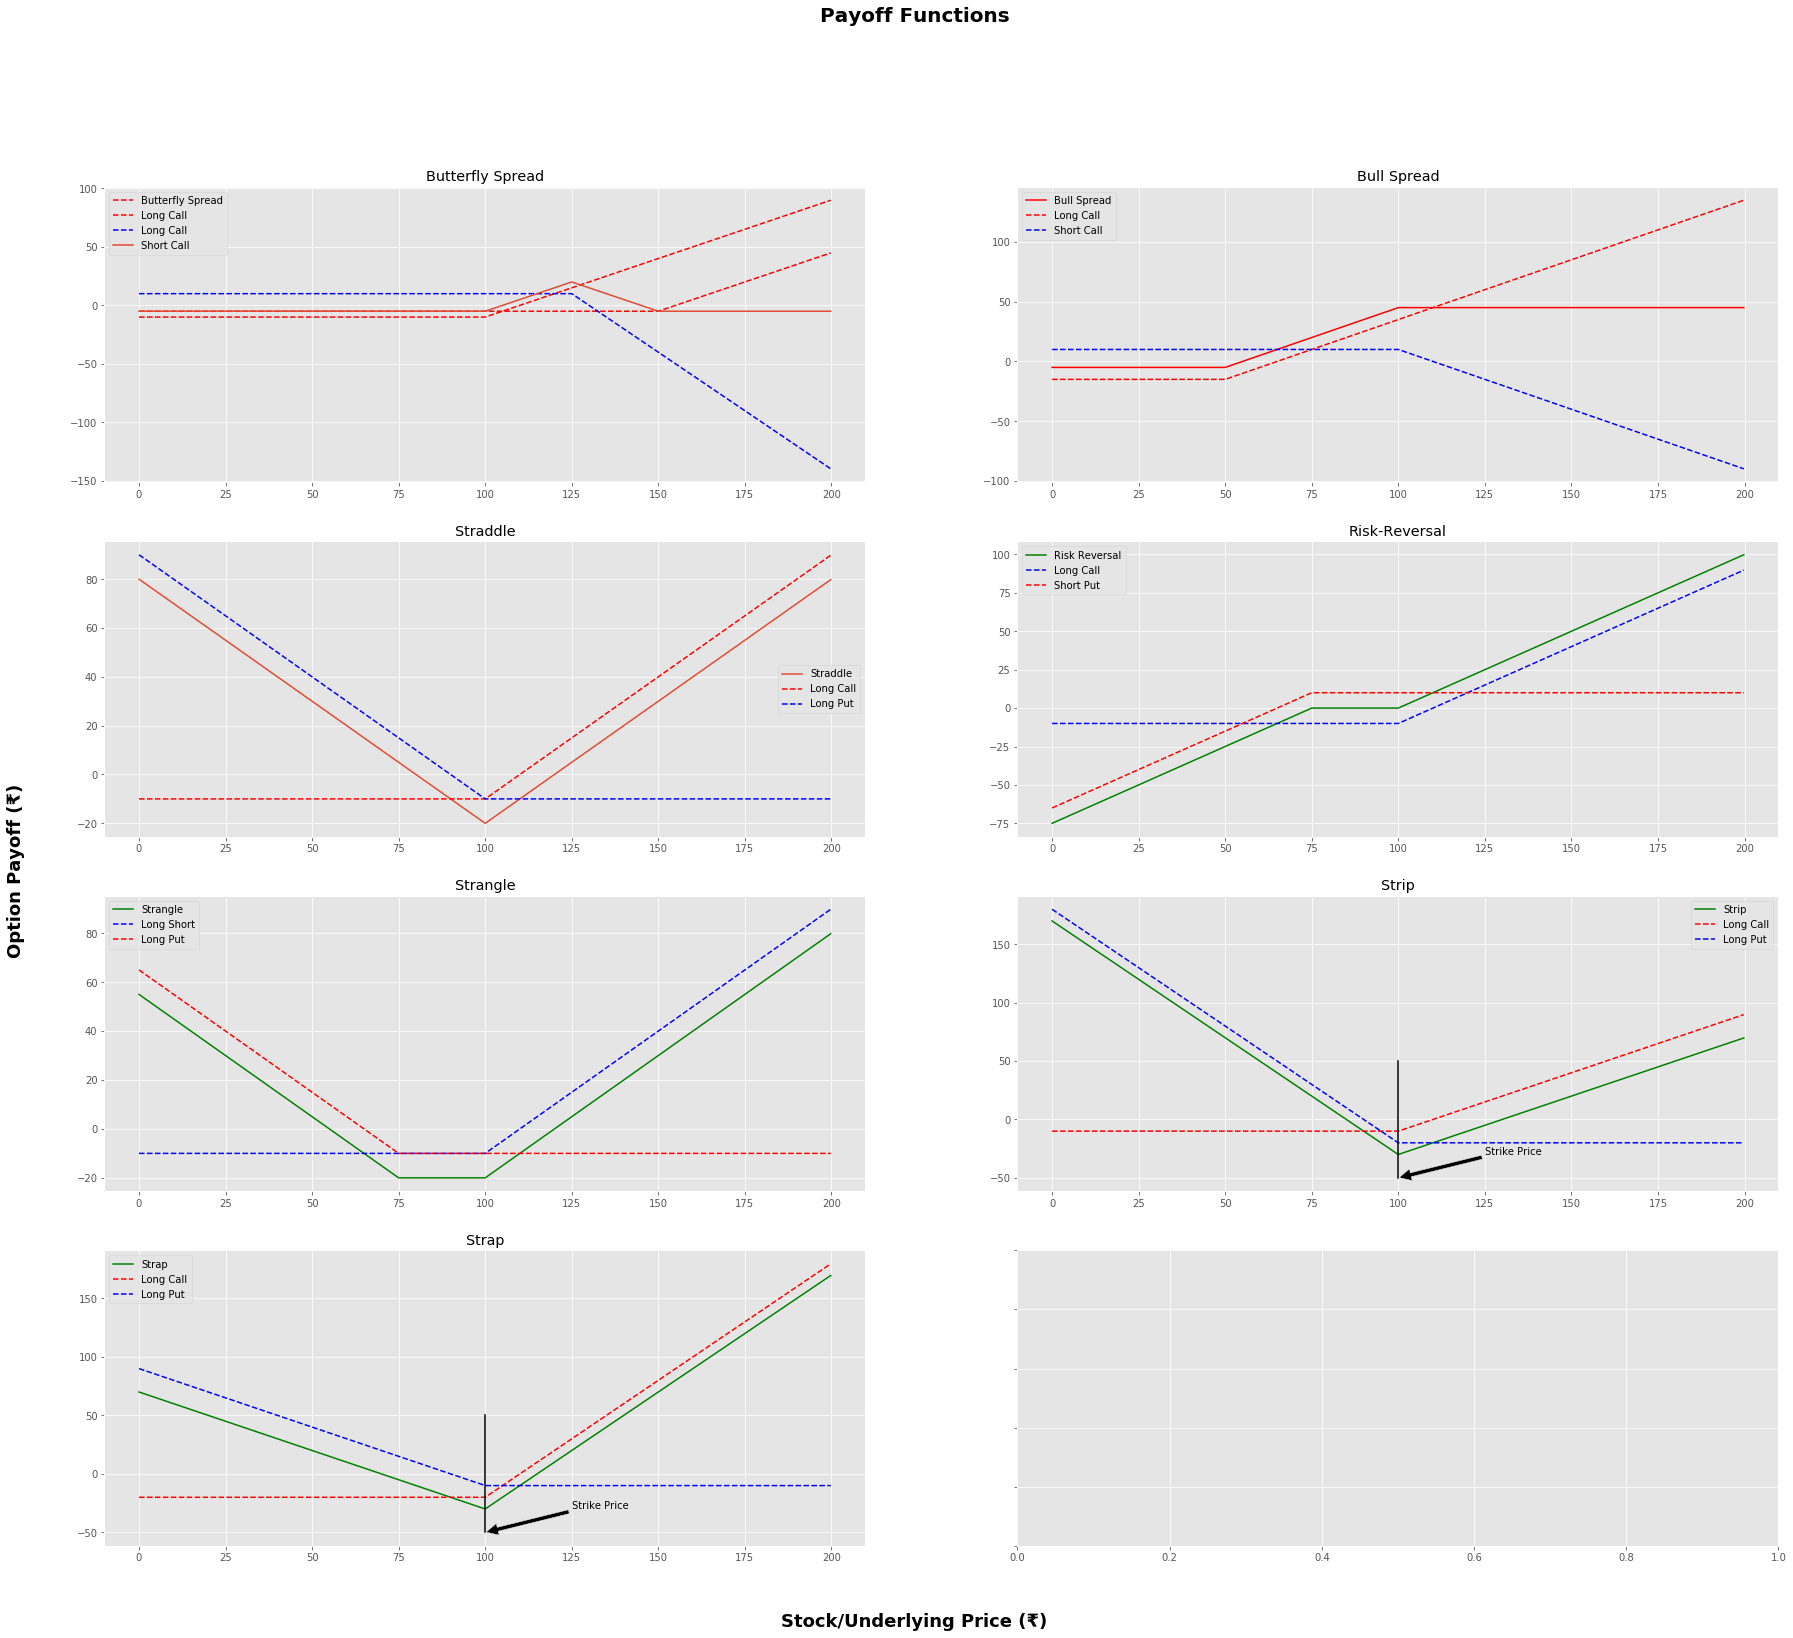

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(30, 25))
fig.suptitle('Payoff Functions', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price (₹)', ha='center', fontsize=18, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff (₹)', va='center', rotation='vertical', fontsize=18, fontweight='bold')

plt.subplot(421)
P = butterfly_spread(S, 100, 125, 150, 10, 5, 5)
P_1 = long_call(S, 100, 10)
P_2 = long_call(S, 150, 5)
P_3 = short_call(S, 125, 5)
P_3 =[2*p for p in P_3]
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'r--')
plt.plot(S, P_3, 'b--')
plt.plot(S, P)
plt.legend(["Butterfly Spread", "Long Call", "Long Call", "Short Call"])
plt.title("Butterfly Spread")

plt.subplot(422)
P1 = bull_spread(S,50, 100, 15, 10)
long_c = long_call(S, 50, 15)
short_c = short_call(S, 100, 10)
    
plt.plot(S, P1, 'r')
plt.plot(S, long_c, 'r--')
plt.plot(S, short_c, 'b--')

plt.legend(["Bull Spread", "Long Call", "Short Call"])
plt.title("Bull Spread")

plt.subplot(423)
P = straddle(S,100, 10, 10)
P_longcall = long_call(S, 100, 10)
P_longput = long_put(S, 100, 10)
plt.plot(S, P) 
plt.plot(S, P_longcall, 'r--')
plt.plot(S, P_longput, 'b--')
plt.legend(["Straddle", "Long Call", "Long Put"])
plt.title("Straddle")

plt.subplot(424)
P = risk_reversal(S,100,75, 10, 10)
P_longcall = long_call(S, 100, 10)
P_shortput = short_put(S,75, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_shortput, 'r--')
plt.legend(["Risk Reversal", "Long Call", "Short Put"])
plt.title("Risk-Reversal")

plt.subplot(425)
P = strangle(S,100, 75, 10, 10)
P_longcall = long_call(S, 100, 10)
P_longput = long_put(S, 75, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_longput, 'r--')
plt.legend(["Strangle", "Long Short", "Long Put"])
plt.title("Strangle")

plt.subplot(426)
P_1 = long_call(S, 100, 10)
P_2 = long_put(S, 100, 10)
P_2 = [2*p for p in P_2]
P = strip(S, 100, 10, 10 )
plt.plot(S, P, 'g')
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'b--')
plt.plot([100,100],[-50,50],'black')
plt.legend(["Strip", "Long Call", "Long Put"])
plt.annotate('Strike Price', xy=(100, -50), xytext=(125, -30), arrowprops = dict(facecolor='black', shrink=0.01))
plt.title("Strip")

plt.subplot(427)
P_1 = long_call(S, 100, 10)
P_2 = long_put(S, 100, 10)
P_1 = [2*p for p in P_1]
P = strap(S, 100, 10, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'b--')
plt.plot([100,100],[-50,50],'black')
plt.legend(["Strap", "Long Call", "Long Put"])
plt.annotate('Strike Price', xy=(100, -50), xytext=(125, -30), arrowprops = dict(facecolor='black', shrink=0.01))
plt.title("Strap")

plt.show()

In [8]:
from scipy.stats import norm

# Greeks

Delta:
 in-the-money options will move more than out-of-the-money options, 
 and short-term options will react more than longer-term options to the same price change in the stock.

 As expiration nears, the delta for in-the-money calls will approach 1, 
 reflecting a one-to-one reaction to price changes in the stock. 
 Delta for out-of the-money calls will approach 0 and won’t react at all to price changes in the stock.
 
 As an option gets further in-the-money, the probability it will be in-the-money at expiration increases as well. 
 So the option’s delta will increase.
 
Vega:
 Typically, as implied volatility increases, the value of options will increase.
 
 Options tend to be more expensive when volatility is higher.
 
 Usually larger for at-the-money (ATM) options versus in- or out-of-the-money

Rho:
 Increasing interest rates typically favor call options, 
 while interest rate decreases usually raise the value of put options.
 
 Interest rate increases usually increase the value of long options-calls, and decrease the value of short options-puts. 
 Therefore, long calls and short puts have a positive rho; long puts and short calls have a negative rho.
 
 Rho values are highest for options with a strike price that is either at-the-money or in-the-money.

Theta:
 At-the-money options will experience more significant dollar losses over time than in- or out-of-the-money options 
 with the same underlying stock and expiration date. 
 That’s because at-the-money options have the most time value built into the premium. 
 And the bigger the chunk of time value built into the price, the more there is to lose.
 
Gamma:
 Options with the highest gamma are the most responsive to changes in the price of the underlying stock.
 
 The price of near-term at-the-money options will exhibit the most explosive response to price changes in the stock
 
 If you’re an option buyer, high gamma is good as long as your forecast is correct. 
 That’s because as your option moves in-the-money, delta will approach 1 more rapidly. 
 But if your forecast is wrong, it can come back to bite you by rapidly lowering your delta.
 
 If you’re an option seller and your forecast is incorrect, high gamma is the enemy. 
 That’s because it can cause your position to work against you at a more accelerated rate if the option 
 you’ve sold moves in-the-money. But if your forecast is correct, 
 high gamma is your friend since the value of the option you sold will lose value more rapidly.

In [9]:
 #   S: underlying stock price 
 #   K: Option strike price 
 #   r: risk free rate 
 #   D: dividend value 
 #   vol: Volatility 
 #   T: time to expiry

def d1_calc(S, K, r, vol, T, t):
    # Calculate d1 in the BSM equation     
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))

def BS_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

def BS_put(S, K, r, vol, T, t):
    return BS_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K

def BS_binary_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    return np.exp(-r*T)*norm.cdf(d2)

def BS_binary_put(S, K, r, vol, T, t):
    return BS_binary_call(S, K, r, vol, T,t) - S + np.exp(-r*(T-t))*K

# 1st Order Greeks 
def delta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    
    if(otype == "call"):
        delta = np.exp(-(T-t))*norm.cdf(d1)
    elif(otype == "put"):
        delta = -np.exp(-(T-t))*norm.cdf(-d1)

    return delta
 
def vega(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    return S * norm.pdf(d1) * np.sqrt(T-t)

def rho(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    
    if(otype == "call"):
        rho = K*(T-t)*np.exp(-r*(T-t))*norm.cdf(d2)
    elif(otype == "put"):
        rho = -K*(T-t)*np.exp(-r*(T-t))*norm.cdf(-d2)
    return rho

def theta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    
    if(otype == "call"):
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) - r*K*np.exp(-r*(T-t))*norm.cdf(d2) 
    elif(otype == "put"):
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) + r*K*np.exp(-r*(T-t))*norm.cdf(-d2)

    return theta

#2nd Order Greeks 

def gamma(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    gamma = (norm.pdf(d1)) / (S * vol * np.sqrt(T-t))
    
    return gamma


/Users/aayush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


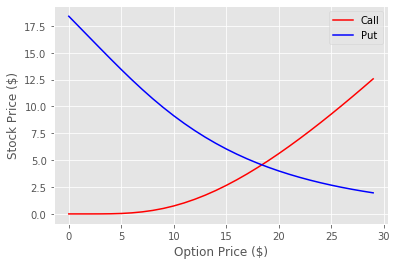

In [13]:
S = np.arange(0, 30)
vals_call = [BS_call(x, 50, 0.10, 0.2, 10, 0) for x in S]
vals_put = [BS_put(x, 50, 0.10, 0.2, 10, 0) for x in S]
plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S, vals_put, 'b', label  = "Put")
plt.legend()
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")
plt.show()

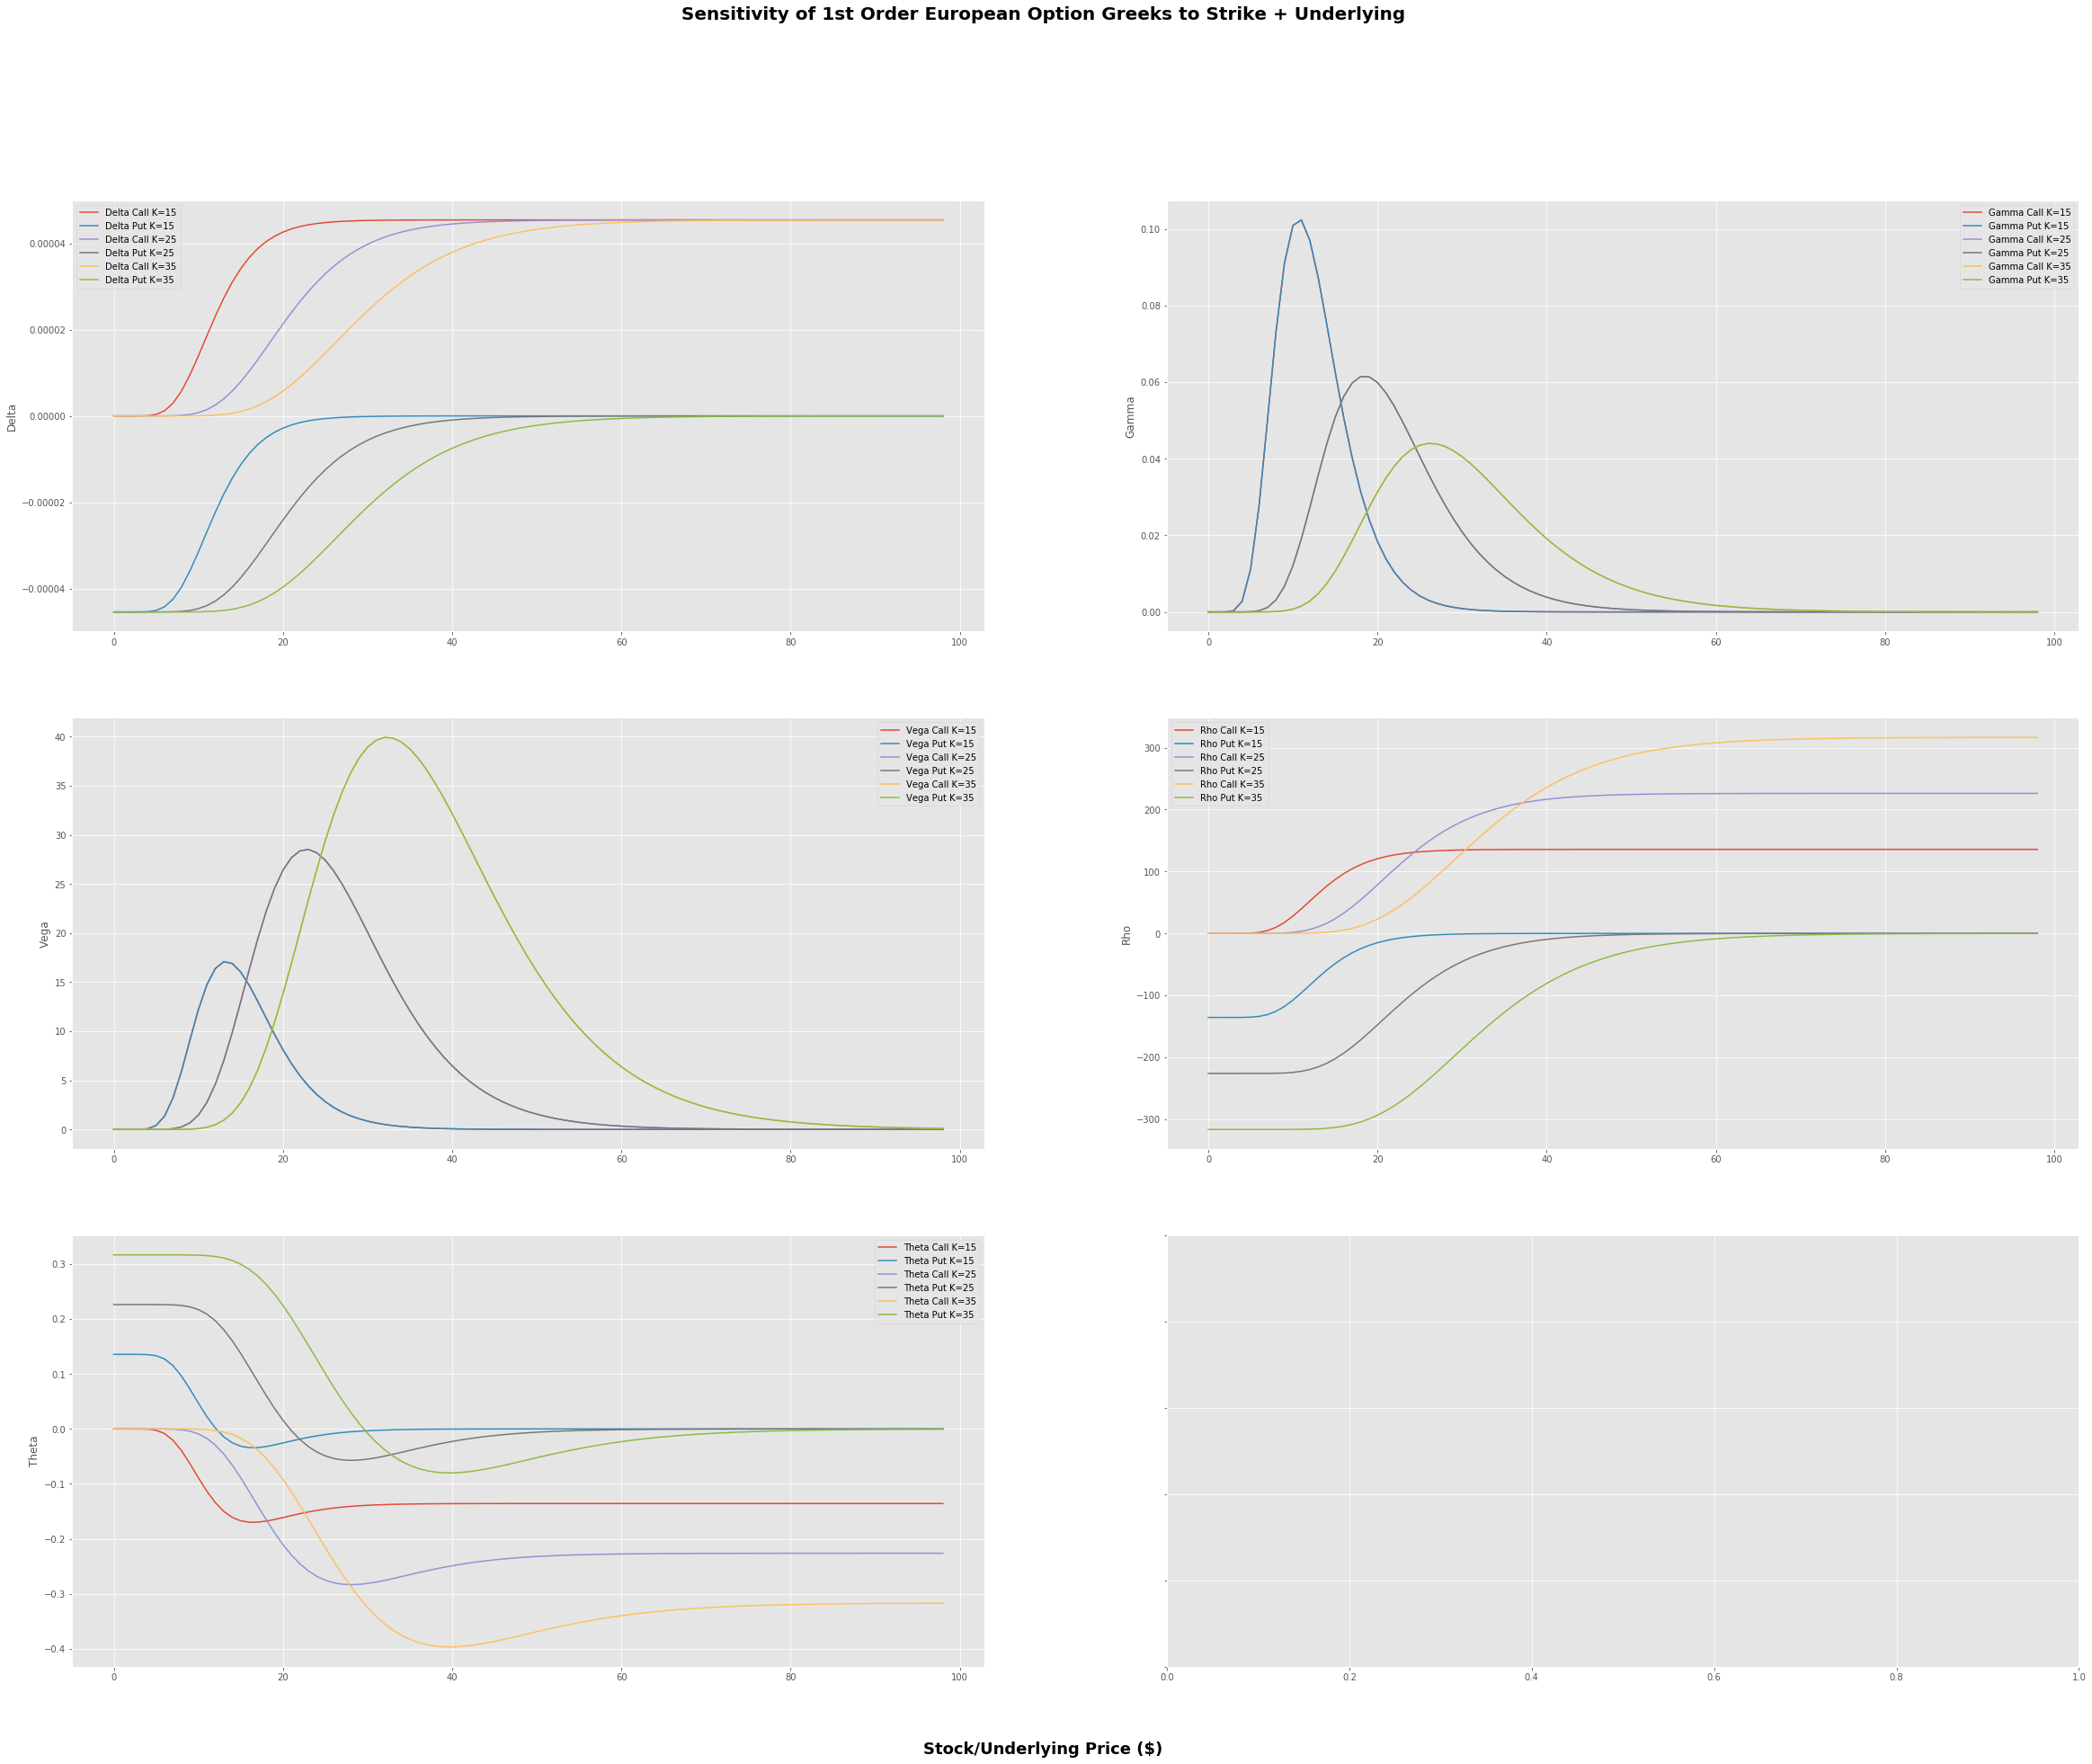

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(40, 30))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to Strike + Underlying', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')
vals = [15,25,35]

r = 0.01
vol = 0.1
T = 10
t = 0
plt.subplot(321)
for i in vals:
    tmp_c = [delta(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [delta(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Delta Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Delta Put K=%i" % i ))

plt.ylabel("Delta")
plt.legend()

plt.subplot(322)
for i in vals:
    tmp_c = [gamma(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [gamma(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Gamma Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Gamma Put K=%i" % i ))

plt.ylabel("Gamma")
plt.legend()

plt.subplot(323)
for i in vals:
    tmp_c = [vega(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [vega(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Vega Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Vega Put K=%i" % i ))

plt.ylabel("Vega")
plt.legend()

plt.subplot(324)

for i in vals:
    tmp_c = [rho(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [rho(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Rho Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Rho Put K=%i" % i ))

plt.ylabel("Rho")
plt.legend()

plt.subplot(325)
for i in vals:
    tmp_c = [theta(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [theta(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Theta Call K=%i" % i ))
    plt.plot(tmp_p, label = ("Theta Put K=%i" % i ))

plt.ylabel("Theta")
plt.legend()

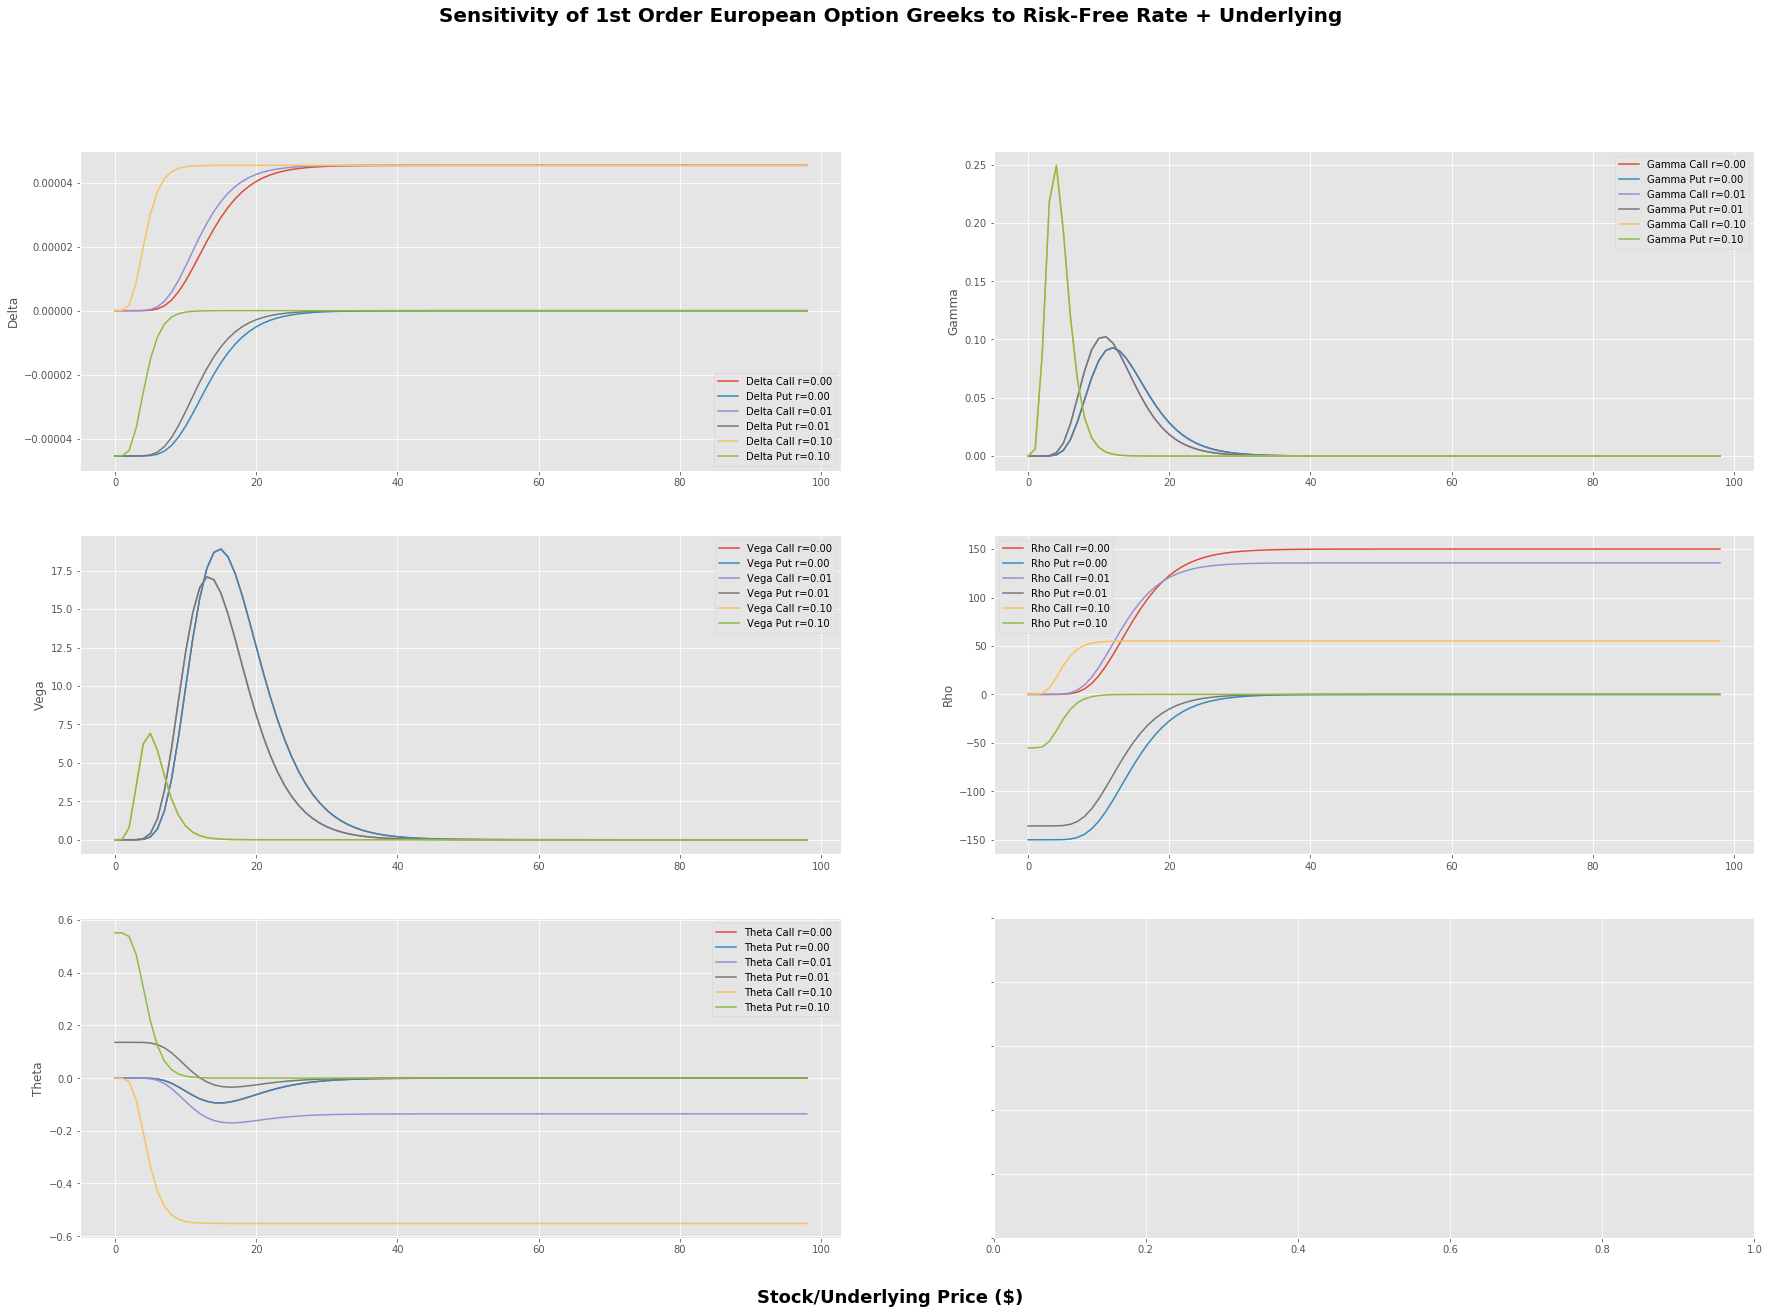

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(30, 20))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to Risk-Free Rate + Underlying', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')

vals = [0,0.01,0.1]
K = 15
r = 0.01
vol = 0.1
T = 10
t = 0
plt.subplot(321)
for i in vals:
    tmp_c = [delta(s, K, i, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [delta(s, K, i, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Delta Call r=%.2f" % i ))
    plt.plot(tmp_p, label = ("Delta Put r=%.2f" % i ))

plt.ylabel("Delta")
plt.legend()

plt.subplot(322)
for i in vals:
    tmp_c = [gamma(s, K, i, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [gamma(s, K, i, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Gamma Call r=%.2f" % i ))
    plt.plot(tmp_p, label = ("Gamma Put r=%.2f" % i ))

plt.ylabel("Gamma")
plt.legend()

plt.subplot(323)
for i in vals:
    tmp_c = [vega(s, K, i, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [vega(s, K, i, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Vega Call r=%.2f" % i ))
    plt.plot(tmp_p, label = ("Vega Put r=%.2f" % i ))

plt.ylabel("Vega")
plt.legend()

plt.subplot(324)

for i in vals:
    tmp_c = [rho(s, K, i, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [rho(s, K, i, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Rho Call r=%.2f" % i ))
    plt.plot(tmp_p, label = ("Rho Put r=%.2f" % i ))

plt.ylabel("Rho")
plt.legend()

plt.subplot(325)
for i in vals:
    tmp_c = [theta(s, K, i, vol, T, t, "call") for s in np.arange(1,100)]
    tmp_p = [theta(s, K, i, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Theta Call r=%.2f" % i ))
    plt.plot(tmp_p, label = ("Theta Put r=%.2f" % i ))

plt.ylabel("Theta")
plt.legend()